# IMPORT DATA


In [356]:
import pandas as pd
import numpy as np

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [357]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# PREPROCESSING DATA

In [358]:
#cek dimensi dataset
test.shape

(418, 11)

In [359]:
#cek tipe data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [360]:
#cek statistik sederhana
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [361]:
#cek missing value
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [362]:
test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [363]:
#mengisi kolom fare
test['Fare'].fillna(test['Fare'].mean(), inplace=True)

<ipython-input-363-53ab56faefb4>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Fare'].fillna(test['Fare'].mean(), inplace=True)


In [364]:
#mengisi missing value pada kolom embarked

train['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [365]:
#mengisi kolom age dengan rata-rata
train['Age'].fillna(train['Age'].mean(), inplace=True)
test['Age'].fillna(test['Age'].mean(), inplace=True)

<ipython-input-365-27928f1c317d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].mean(), inplace=True)
<ipython-input-365-27928f1c317d>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [366]:
train['Sex'].value_counts()

,count
Sex,
male,577
female,314


In [367]:
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [368]:
#check value embarked
train['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [369]:
#mengisi missing value kolom embarked dengan modus
train['Embarked'].fillna('S', inplace=True)

<ipython-input-369-8307ad443245>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Embarked'].fillna('S', inplace=True)


In [370]:
#mengahapus kolom kabin
train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)

In [371]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [372]:
test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,0


# EXPLORATORY DATA ANALYST

In [373]:
#menghitung jumlah
count_sex = train["Sex"].value_counts()
count_sex

,count
Sex,
male,577
female,314


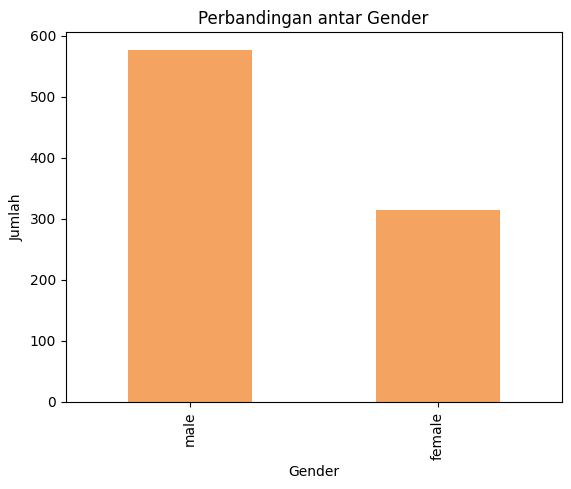

In [374]:
import matplotlib.pyplot as plt
import seaborn as sns


count_sex.plot(kind="bar", color="sandybrown")
plt.xlabel("Gender")
plt.ylabel("Jumlah")
plt.title("Perbandingan antar Gender")
plt.show()

In [375]:
#membuat fungsi untuk bar chart
def barchart(column):
    count_sex = train[column].value_counts()

    count_sex.plot(kind="bar", color="sandybrown")
    plt.xlabel(column)
    plt.ylabel("Jumlah")
    plt.show()

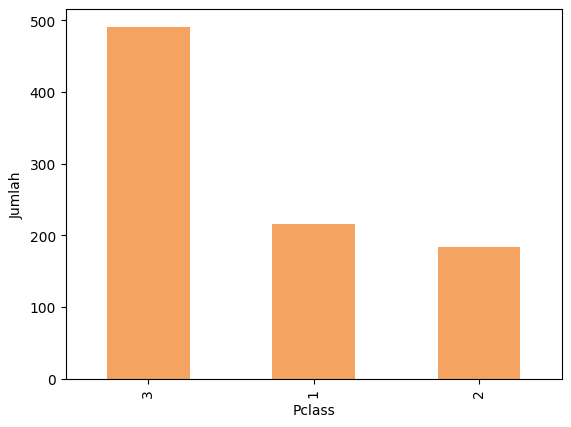

In [376]:
barchart('Pclass')

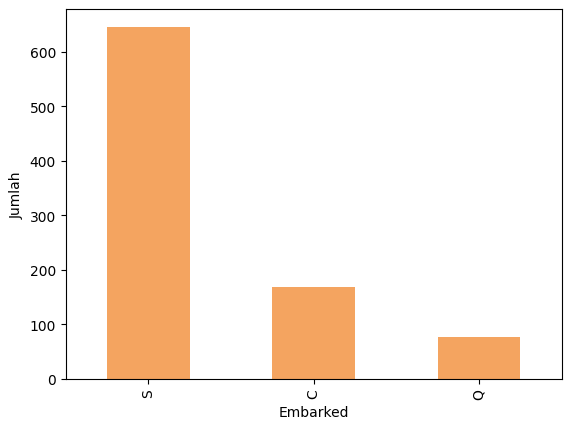

In [377]:
barchart('Embarked')

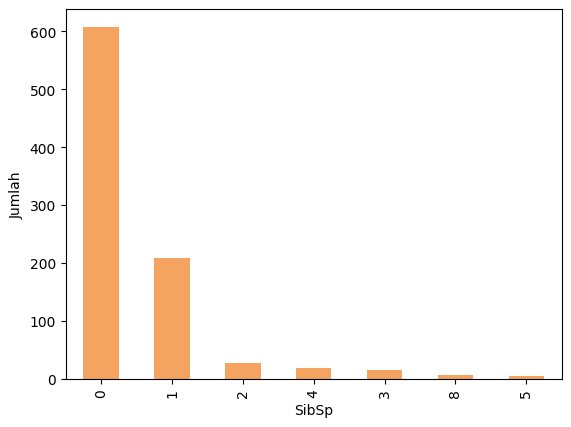

In [378]:
barchart('SibSp')

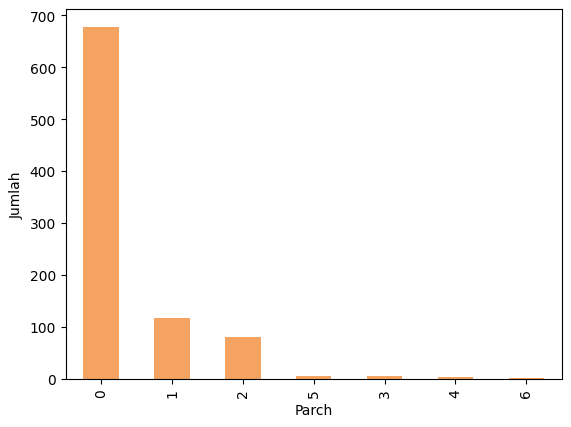

In [379]:
barchart('Parch')

In [380]:
#menghitung survived or not
survived = train.groupby(['Survived', 'Sex']).count()['PassengerId'].reset_index()

survived

,Survived,Sex,PassengerId
0,0,female,81
1,0,male,468
2,1,female,233
3,1,male,109


In [381]:
#membuat fungsi untuk groupbar survived
def group_barchart(column):
  survived = train.groupby(['Survived', column]).count()['PassengerId'].reset_index()


  g = sns.catplot(
      data = survived, kind = 'bar',
      x='Survived', y= 'PassengerId',
      hue=column, palette= "rocket", height= 6 )

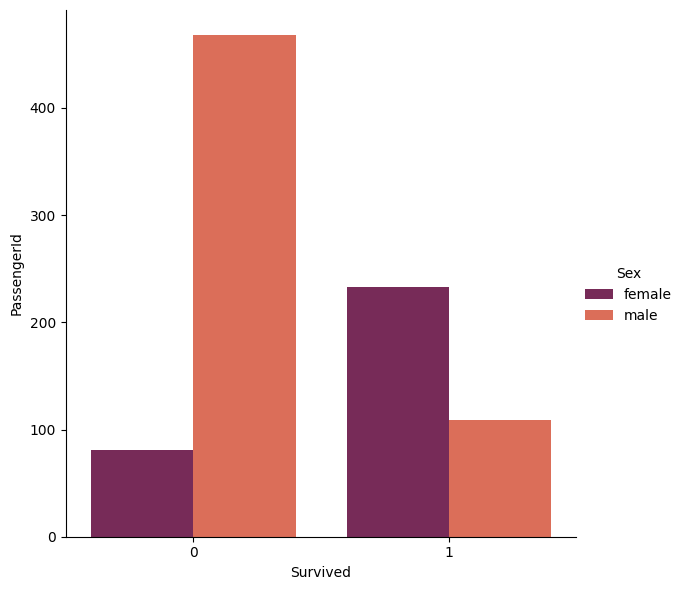

In [382]:
group_barchart('Sex')

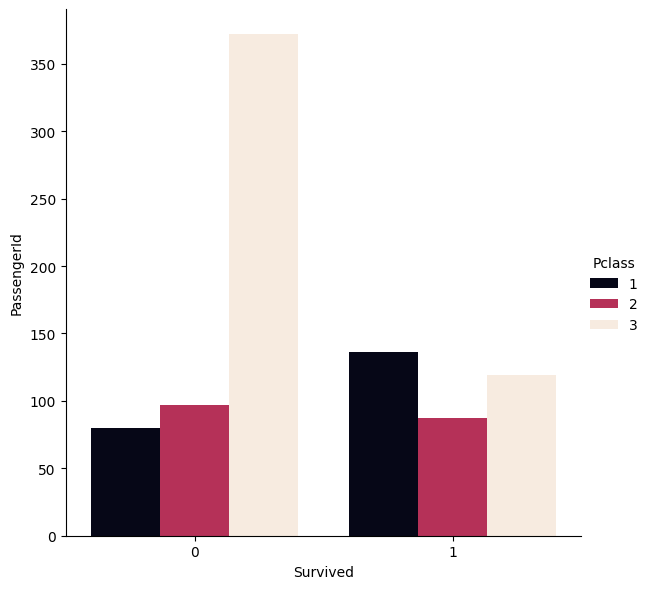

In [383]:
group_barchart('Pclass')

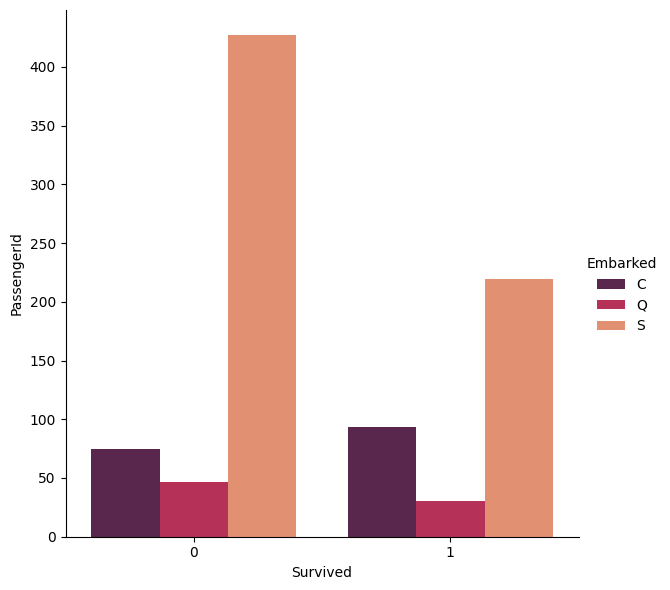

In [384]:
group_barchart('Embarked')

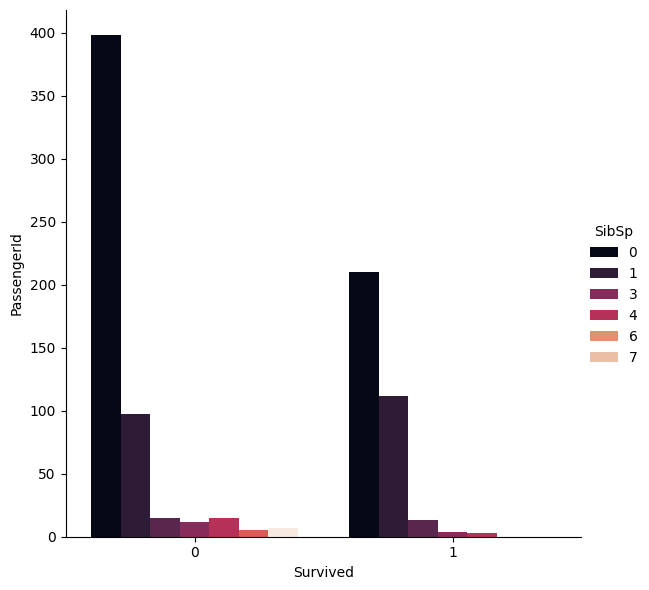

In [385]:
group_barchart('SibSp')

HISTOGRAM



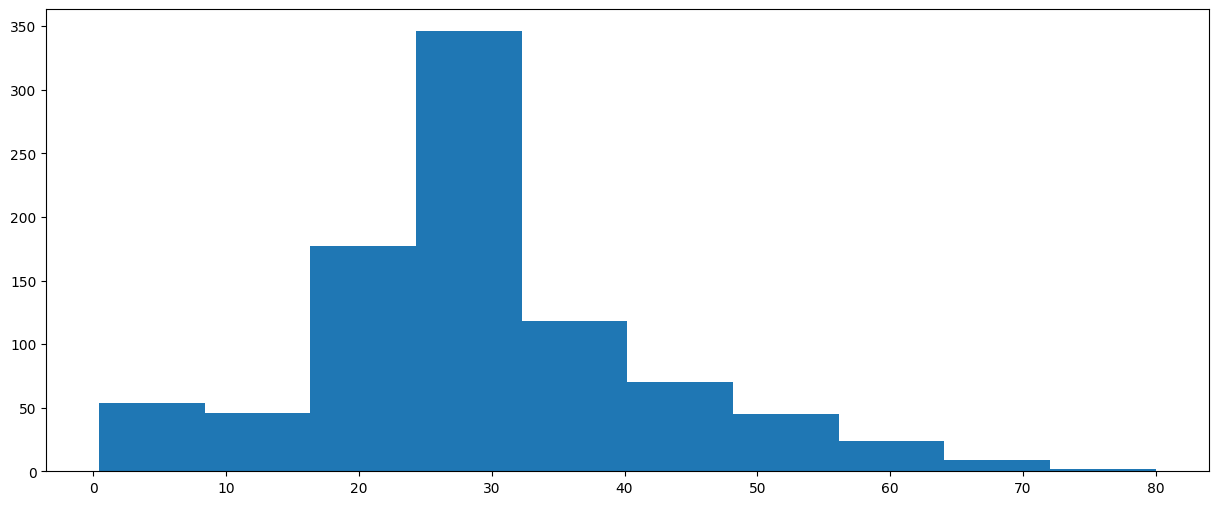

In [386]:
#visualisasi untuk numeric
fig ,ax = plt.subplots(figsize=(15,6))
ax.hist(train.Age)

plt.show()

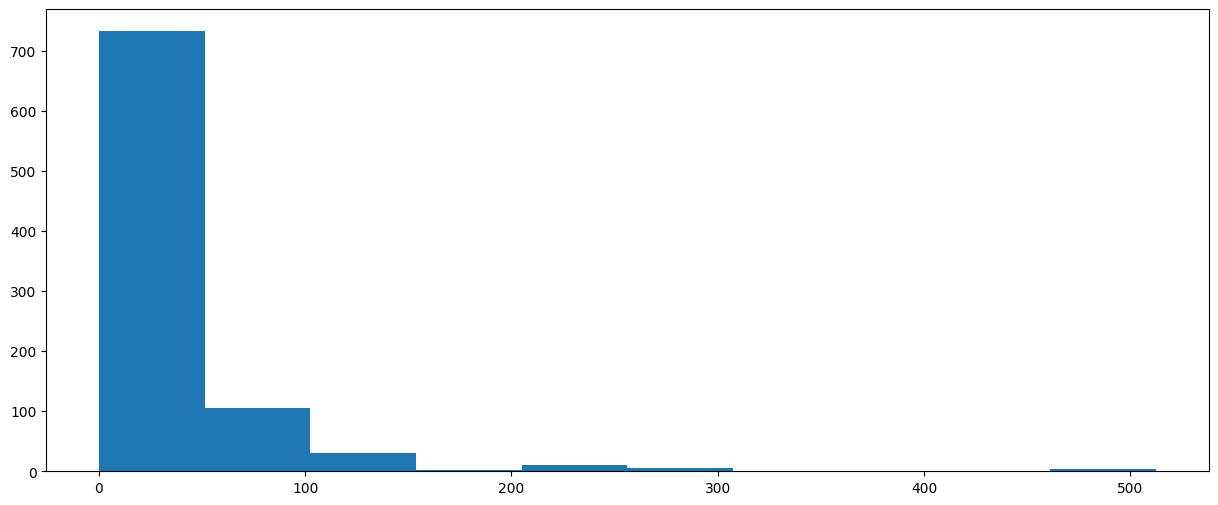

In [387]:
fig ,ax = plt.subplots(figsize=(15,6))
ax.hist(train.Fare)

plt.show()

KDE PLOT

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


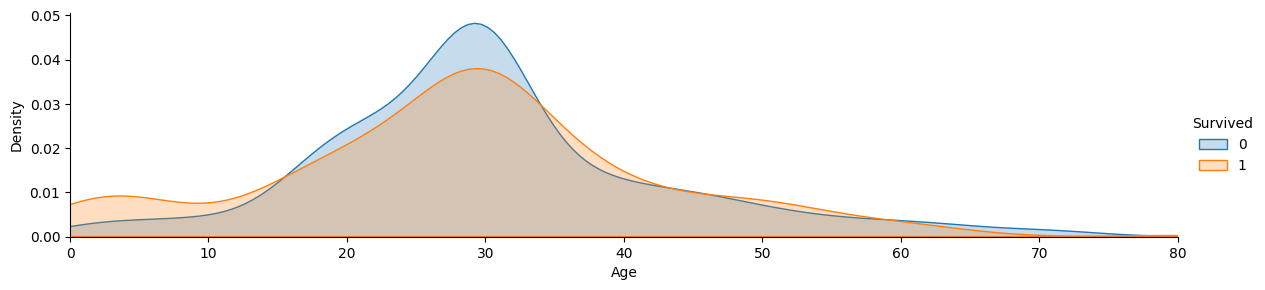

In [388]:
facet = sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


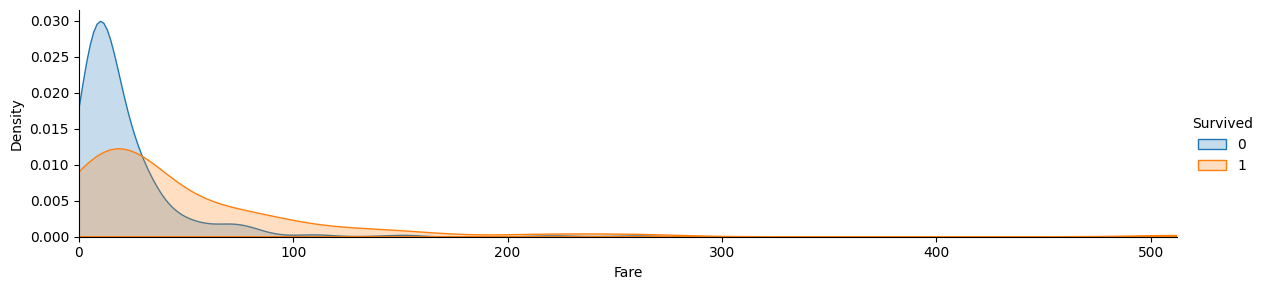

In [389]:
facet = sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()

# Convert data to numeric


In [390]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [391]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [392]:
#convert sex menjadi numeric dengan mapping
sex_mapping = {'male' : 1, 'female':0}

train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)


In [393]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


#Convert Categorical to numeric

In [394]:
embarked = train[['Embarked']]
dummies = pd.get_dummies(embarked)

dummies  = dummies.astype(int)

dummies.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [395]:
train = pd.merge(train.reset_index(), dummies.reset_index())
train.head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S,0,0,1
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,1,0,0
2,2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S,0,0,1
4,4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S,0,0,1


In [396]:
train = train.drop(['index', 'Embarked' ], axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,0,1


In [397]:
embarked = test[['Embarked']]
dummies_test = pd.get_dummies(embarked)

dummies_test  = dummies_test.astype(int)
dummies_test.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1


In [398]:
test = pd.merge(test.reset_index(), dummies_test.reset_index())
test.head()

,index,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,Q,0,1,0
1,1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,S,0,0,1
2,2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,Q,0,1,0
3,3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,S,0,0,1
4,4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,S,0,0,1


In [407]:
test = test.drop(['index', 'Embarked' ], axis=1)
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title
0,3,1,34.5,0,0,7.8292,0,1,0,1
1,3,0,47.0,1,0,7.0000,0,0,1,3
2,2,1,62.0,0,0,9.6875,0,1,0,1
3,3,1,27.0,0,0,8.6625,0,0,1,1
4,3,0,22.0,1,1,12.2875,0,0,1,3


In [400]:
train['Title'] = train['Name'].str.extract('([A-Za-z]+)\.', expand=False)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,0,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,0,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0,0,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,0,1,Mr


In [401]:
title_mapping = {"Mr": 1,
                 "Miss": 2,
                 "Mrs": 3, "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3, "Countess": 3, "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3, "Capt": 3,"Sir": 3 }
train['Title'] = train['Title'].map(title_mapping)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,0,0,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0,0,1,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,0,1,1


In [402]:
test['Title'] = test['Name'].str.extract('([A-Za-z]+)\.', expand=False)

In [403]:
test['Title'] = test ['Title'].map(title_mapping)

In [404]:
train.shape , test.shape

((891, 14), (418, 15))

In [414]:
train = train.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
test_id = test['PassengerId']


test = test.drop(['PassengerId', 'Name', 'Ticket'], axis=1)



KeyError: "['Name', 'Ticket'] not found in axis"

In [416]:
train= train.drop(['PassengerId'], axis=1)

In [419]:
train.shape , test.shape

((891, 11), (418, 10))

In [420]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title
0,0,3,1,22.0,1,0,7.2500,0,0,1,1
1,1,1,0,38.0,1,0,71.2833,1,0,0,3
2,1,3,0,26.0,0,0,7.9250,0,0,1,2
3,1,1,0,35.0,1,0,53.1000,0,0,1,3
4,0,3,1,35.0,0,0,8.0500,0,0,1,1


In [421]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title
0,3,1,34.5,0,0,7.8292,0,1,0,1
1,3,0,47.0,1,0,7.0000,0,0,1,3
2,2,1,62.0,0,0,9.6875,0,1,0,1
3,3,1,27.0,0,0,8.6625,0,0,1,1
4,3,0,22.0,1,1,12.2875,0,0,1,3


# Modelling


In [423]:
#membuat model menggunakan decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


In [424]:
train_data = train.drop('Survived', axis= 1)
target = train['Survived']

In [425]:
#menggunakan model GaussianNB naive_bayes
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.81111111 0.75280899 0.7752809  0.79775281 0.76404494 0.79775281
 0.79775281 0.83146067 0.82022472 0.83146067]


In [426]:
score.mean()

0.7979650436953807

In [427]:
k_fold = KFold(n_splits=5 , shuffle=True, random_state=0)

clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.74301676 0.79213483 0.78089888 0.7752809  0.79775281]


In [428]:
score.mean()

0.7778168351013747

In [429]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title
0,3,1,34.5,0,0,7.8292,0,1,0,1
1,3,0,47.0,1,0,7.0000,0,0,1,3
2,2,1,62.0,0,0,9.6875,0,1,0,1
3,3,1,27.0,0,0,8.6625,0,0,1,1
4,3,0,22.0,1,1,12.2875,0,0,1,3


In [430]:
clf = GaussianNB()
clf.fit(train_data, target)

GaussianNB()

In [431]:
prediction = clf.predict(test)

In [432]:
df_test = pd.read_csv("test.csv")
submission = pd.DataFrame({
        "PassengerId": df_test["PassengerId"],
        "Survived": prediction
    })
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [433]:
submission.to_csv("submit.csv", index = False)

In [434]:
test['Survived'] = submission['Survived']
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title,Survived
0,3,1,34.5,0,0,7.8292,0,1,0,1,0
1,3,0,47.0,1,0,7.0000,0,0,1,3,1
2,2,1,62.0,0,0,9.6875,0,1,0,1,0
3,3,1,27.0,0,0,8.6625,0,0,1,1,0
4,3,0,22.0,1,1,12.2875,0,0,1,3,1
